# Run Any Kind of Logistic Regression (Binomial, Multinomial, etc.)

### Authors: Calvin Howard.

#### Last updated: March 16, 2024

Use this to run/test a statistical model on a spreadsheet.

Notes:
- To best use this notebook, you should be familar with GLM design and Contrast Matrix design. See this webpage to get started:
[FSL's GLM page](https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/GLM)

# 00 - Import CSV with All Data
**The CSV is expected to be in this format**
- ID and absolute paths to niftis are critical
```
+-----+----------------------------+--------------+--------------+--------------+
| ID  | Nifti_File_Path            | Covariate_1  | Covariate_2  | Covariate_3  |
+-----+----------------------------+--------------+--------------+--------------+
| 1   | /path/to/file1.nii.gz      | 0.5          | 1.2          | 3.4          |
| 2   | /path/to/file2.nii.gz      | 0.7          | 1.4          | 3.1          |
| 3   | /path/to/file3.nii.gz      | 0.6          | 1.5          | 3.5          |
| 4   | /path/to/file4.nii.gz      | 0.9          | 1.1          | 3.2          |
| ... | ...                        | ...          | ...          | ...          |
+-----+----------------------------+--------------+--------------+--------------+
```

Prep Output Directory

In [1]:
# Specify where you want to save your results to
out_dir = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/collaborations/barotono_disease_classification/metadata/dataset_4/Figs/peak_atrophy'

Import Data

In [2]:
# Specify the path to your CSV file containing NIFTI paths
input_csv_path = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/collaborations/barotono_disease_classification/metadata/dataset_4/updated_differential_diagnosis_matrix_peak.csv'
sheet = None

In [3]:
from calvin_utils.permutation_analysis_utils.statsmodels_palm import CalvinStatsmodelsPalm
# Instantiate the PalmPrepararation class
cal_palm = CalvinStatsmodelsPalm(input_csv_path=input_csv_path, output_dir=out_dir, sheet=sheet)
# Call the process_nifti_paths method
data_df = cal_palm.read_and_display_data()
data_df

/usr/local/Caskroom/mambaforge/base/envs/nimlab_py310/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,DX,SUBID,AD,SV,LBD,BV,PNFA,CBS,PSP,CN,Peak_Values
0,AD,002_S_5018,0.274697,0.236974,0.206284,0.058076,-0.003556,-0.061958,0.064401,0.049505,3.958120
1,AD,003_S_4136,0.266863,0.169714,0.301794,0.238919,-0.043050,-0.090273,0.064663,0.087982,6.707466
2,AD,003_S_4152,0.309767,-0.005867,0.270765,0.351072,0.321640,0.089697,0.102666,0.050549,4.700880
3,AD,003_S_4373,0.294166,0.104773,-0.059247,-0.024040,0.153165,0.140114,-0.098544,0.048240,5.562066
4,AD,003_S_4892,0.121190,0.085156,0.030894,-0.043562,-0.043216,-0.089155,-0.109166,0.000851,3.858787
...,...,...,...,...,...,...,...,...,...,...,...
622,PSP,1_S_5091,-0.012585,-0.076982,0.241457,0.274615,0.300414,0.273924,0.359884,0.110915,3.304003
623,PSP,1_S_5093,0.112110,-0.065346,0.100739,0.054500,0.171525,0.404358,0.306781,0.009772,4.854170
624,PSP,1_S_5095,0.071034,0.060069,0.256409,0.249248,0.212178,0.206000,0.235424,0.072760,3.043384
625,PSP,1_S_5096,0.108565,0.106482,0.135455,0.173665,0.149068,0.216797,0.304357,0.069126,5.483599


# 01 - Preprocess Your Data

**Handle NANs**
- Set drop_nans=True is you would like to remove NaNs from data
- Provide a column name or a list of column names to remove NaNs from

In [4]:
drop_list = ['DX']

In [5]:
data_df = cal_palm.drop_nans_from_columns(columns_to_drop_from=drop_list)
display(data_df)

,DX,SUBID,AD,SV,LBD,BV,PNFA,CBS,PSP,CN,Peak_Values
0,AD,002_S_5018,0.274697,0.236974,0.206284,0.058076,-0.003556,-0.061958,0.064401,0.049505,3.958120
1,AD,003_S_4136,0.266863,0.169714,0.301794,0.238919,-0.043050,-0.090273,0.064663,0.087982,6.707466
2,AD,003_S_4152,0.309767,-0.005867,0.270765,0.351072,0.321640,0.089697,0.102666,0.050549,4.700880
3,AD,003_S_4373,0.294166,0.104773,-0.059247,-0.024040,0.153165,0.140114,-0.098544,0.048240,5.562066
4,AD,003_S_4892,0.121190,0.085156,0.030894,-0.043562,-0.043216,-0.089155,-0.109166,0.000851,3.858787
...,...,...,...,...,...,...,...,...,...,...,...
622,PSP,1_S_5091,-0.012585,-0.076982,0.241457,0.274615,0.300414,0.273924,0.359884,0.110915,3.304003
623,PSP,1_S_5093,0.112110,-0.065346,0.100739,0.054500,0.171525,0.404358,0.306781,0.009772,4.854170
624,PSP,1_S_5095,0.071034,0.060069,0.256409,0.249248,0.212178,0.206000,0.235424,0.072760,3.043384
625,PSP,1_S_5096,0.108565,0.106482,0.135455,0.173665,0.149068,0.216797,0.304357,0.069126,5.483599


**Drop Row Based on Value of Column**

Define the column, condition, and value for dropping rows
- column = 'your_column_name'
- condition = 'above'  # Options: 'equal', 'above', 'below'

In [6]:
data_df.columns

Index(['DX', 'SUBID', 'AD', 'SV', 'LBD', 'BV', 'PNFA', 'CBS', 'PSP', 'CN',
       'Peak_Values'],
      dtype='object')

Set the parameters for dropping rows

In [ ]:
column = 'Cohort'  # The column you'd like to evaluate
condition = 'equal'  # The condition to check ('equal', 'above', 'below', 'not')
value = 0 # The value to drop if found

In [ ]:
data_df, other_df = cal_palm.drop_rows_based_on_value(column, condition, value)
display(data_df)

**Standardize Data**
- Enter Columns you Don't want to standardize into a list

In [ ]:
# Remove anything you don't want to standardize
cols_not_to_standardize = ['DX', 'SUBID'] # ['Z_Scored_Percent_Cognitive_Improvement_By_Origin_Group', 'Z_Scored_Subiculum_T_By_Origin_Group_'] #['Age']


In [ ]:
data_df = cal_palm.standardize_columns(cols_not_to_standardize)
data_df

# 00 - Define Your Formula

This is the formula relating outcome to predictors, and takes the form:
- y = B0 + B1 + B2 + B3 + . . . BN

It is defined using the columns of your dataframe instead of the variables above:
- 'Apples_Picked ~ hours_worked + owns_apple_picking_machine'

____
**Normal Logistic**
- Assesses the impact of multiple predictors on an outcome.
- formula = 'Binary Outcome ~ Predictor1 + Predictor2'

**Multiple Logistic**
- Assesses the impact of predictor on an outcome.
- formula = 'Ordinal Outcome ~ Predictor1 + Predictor2'

____
Use the printout below to design your formula. 
- Left of the "~" symbol is the thing to be predicted. 
- Right of the "~" symbol are the predictors. 
- ":" indicates an interaction between two things. 
- "*" indicates and interactions AND it accounts for the simple effects too. 
- "+" indicates that you want to add another predictor. 

In [7]:
data_df.columns

Index(['DX', 'SUBID', 'AD', 'SV', 'LBD', 'BV', 'PNFA', 'CBS', 'PSP', 'CN',
       'Peak_Values'],
      dtype='object')

In [8]:
formula = "DX ~ AD + SV + LBD + BV + PNFA + CBS + PSP + CN + Peak_Values"

# 02 - Visualize Your Design Matrix

This is the explanatory variable half of your regression formula
_______________________________________________________
Create Design Matrix: Use the create_design_matrix method. You can provide a list of formula variables which correspond to column names in your dataframe.

- design_matrix = palm.create_design_matrix(formula_vars=["var1", "var2", "var1*var2"])
- To include interaction terms, use * between variables, like "var1*var2".
- By default, an intercept will be added unless you set intercept=False
- **don't explicitly add the 'intercept' column. I'll do it for you.**

In [9]:
# Define the design matrix
outcome_matrix, design_matrix = cal_palm.define_design_matrix(formula, data_df)
design_matrix

,Intercept,AD,SV,LBD,BV,PNFA,CBS,PSP,CN,Peak_Values
0,1.0,0.274697,0.236974,0.206284,0.058076,-0.003556,-0.061958,0.064401,0.049505,3.958120
1,1.0,0.266863,0.169714,0.301794,0.238919,-0.043050,-0.090273,0.064663,0.087982,6.707466
2,1.0,0.309767,-0.005867,0.270765,0.351072,0.321640,0.089697,0.102666,0.050549,4.700880
3,1.0,0.294166,0.104773,-0.059247,-0.024040,0.153165,0.140114,-0.098544,0.048240,5.562066
4,1.0,0.121190,0.085156,0.030894,-0.043562,-0.043216,-0.089155,-0.109166,0.000851,3.858787
...,...,...,...,...,...,...,...,...,...,...
622,1.0,-0.012585,-0.076982,0.241457,0.274615,0.300414,0.273924,0.359884,0.110915,3.304003
623,1.0,0.112110,-0.065346,0.100739,0.054500,0.171525,0.404358,0.306781,0.009772,4.854170
624,1.0,0.071034,0.060069,0.256409,0.249248,0.212178,0.206000,0.235424,0.072760,3.043384
625,1.0,0.108565,0.106482,0.135455,0.173665,0.149068,0.216797,0.304357,0.069126,5.483599


Check multicollinearity in design matrix

In [10]:
#Multico. Check
from calvin_utils.statistical_utils.statistical_measurements import calculate_vif
calculate_vif(design_matrix)

,features,VIF
0,Intercept,12.671260
1,AD,5.681897
2,SV,5.639784
3,LBD,10.069171
4,BV,10.378444
5,PNFA,5.659956
6,CBS,8.199545
7,PSP,11.858850
8,CN,1.819053
9,Peak_Values,1.417622


# 03 - Visualize Your Dependent Variable

I have generated this for you based on the formula you provided

In [11]:
# outcome_matrix = outcome_matrix.iloc[:, [0]]
outcome_matrix

,DX[AD],DX[BV],DX[CBS],DX[CN],DX[LBD],DX[PNFA],DX[PSP],DX[SV]
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
622,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
623,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
624,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
625,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


**CRITICAL IN MULTINOMIAL LOGISTIC REGRESSION**
- A multinomial logistic reg. will set results RELATIVE TO A REFERENCE class. 
- The reference class is the first classification the multinomial encounters.
- **Especially if you are running a multinomial logistic regression, set your reference class below**

In [12]:
reference = 'Diagnosis[Control]'

# 04 - Run the Regression

Regression Results Are Displayed Below

- This will run a binomial or a multinomial logit dependig on your outcome matrix. 
- A multinomial logit will display N-1 categories, where N is the number of potential classifications you have. This occurs because everything is set in reference to that class. 
- So, the reference will either be the first column in your outcomes_matrix, or you can manually set it first.

In [13]:
from calvin_utils.statistical_utils.logistic_regression import LogisticRegression
logreg = LogisticRegression(outcome_matrix, design_matrix)
results = logreg.run()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.734869
         Iterations 10
----INTERPRETATION KEY----
reference_category : DX[AD]
y=0 : DX[BV]
y=1 : DX[CBS]
y=2 : DX[CN]
y=3 : DX[LBD]
y=4 : DX[PNFA]
y=5 : DX[PSP]
y=6 : DX[SV]
<bound method MultinomialResults.summary2 of <statsmodels.discrete.discrete_model.MultinomialResults object at 0x10dee5e10>>


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: MNLogit
==================================================================
Model:              MNLogit          Pseudo R-squared: 0.599      
Dependent Variable: y                AIC:              1061.5255  
Date:               2024-11-20 11:13 BIC:              1372.3917  
No. Observations:   627              Log-Likelihood:   -460.76    
Df Model:           63               LL-Null:          -1150.3    
Df Residuals:       557              LLR p-value:      9.0691e-247
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     10.0000                                       
------------------------------------------------------------------
     y = 0        Coef.   Std.Err.    t    P>|t|   [0.025   0.975]
------------------------------------------------------------------
  Intercept       -2.3310   0.9264 -2.5162 0.0119  -4.1467 -0.5153
         AD      -15.0846   4.5142 -3.3416 0.0008 -23.9322 -6.2370
         SV        5.9096   3.4982  1.6893 0.0912  -0.9467 12.7659
        LBD       -9.3192   5.3687 -1.7359 0.0826 -19.8416  1.2032
         BV       15.5678   4.4609  3.4898 0.0005   6.8246 24.3111
       PNFA        2.2839   3.6449  0.6266 0.5309  -4.8600  9.4277
        CBS       10.5257   6.0721  1.7334 0.0830  -1.3754 22.4267
        PSP       -4.7664   6.3434 -0.7514 0.4524 -17.1992  7.6664
         CN      -14.6392   6.7866 -2.1571 0.0310 -27.9407 -1.3378
Peak_Values        0.3634   0.1796  2.0233 0.0430   0.0114  0.7155
------------------------------------------------------------------
     y = 1       Coef.   Std.Err.    t    P>|t|   [0.025   0.975] 
------------------------------------------------------------------
  Intercept       1.5070   0.9750  1.5456 0.1222  -0.4040   3.4179
         AD     -31.2897   5.0901 -6.1472 0.0000 -41.2660 -21.3133
         SV       6.3927   4.2226  1.5139 0.1300  -1.8835  14.6689
        LBD       6.0271   5.6253  1.0714 0.2840  -4.9983  17.0525
         BV      -8.3633   5.4982 -1.5211 0.1282 -19.1395   2.4130
       PNFA      -1.2887   4.9938 -0.2580 0.7964 -11.0764   8.4991
        CBS      26.5040   5.9273  4.4715 0.0000  14.8867  38.1214
        PSP       4.6822   6.2834  0.7452 0.4562  -7.6331  16.9975
         CN     -15.3485   6.9003 -2.2243 0.0261 -28.8728  -1.8243
Peak_Values      -0.5647   0.2328 -2.4253 0.0153  -1.0211  -0.1084
------------------------------------------------------------------
     y = 2       Coef.   Std.Err.    t    P>|t|   [0.025   0.975] 
------------------------------------------------------------------
  Intercept       4.8667   0.6563  7.4159 0.0000   3.5805   6.1530
         AD     -23.9956   3.4932 -6.8692 0.0000 -30.8421 -17.1490
         SV       3.0142   2.6678  1.1299 0.2585  -2.2145   8.2430
        LBD       4.6495   3.5655  1.3040 0.1922  -2.3387  11.6378
         BV      -4.8100   3.3261 -1.4462 0.1481 -11.3290   1.7090
       PNFA      -1.4044   2.9506 -0.4760 0.6341  -7.1875   4.3787
        CBS      10.3416   4.0704  2.5407 0.0111   2.3639  18.3194
        PSP      -1.1499   4.2348 -0.2715 0.7860  -9.4500   7.1501
         CN     -10.9520   4.6495 -2.3555 0.0185 -20.0649  -1.8391
Peak_Values      -0.5073   0.1459 -3.4776 0.0005  -0.7931  -0.2214
------------------------------------------------------------------
     y = 3       Coef.   Std.Err.    t    P>|t|   [0.025   0.975] 
------------------------------------------------------------------
  Intercept      -5.7557   1.8983 -3.0320 0.0024  -9.4763  -2.0351
         AD     -33.4135   6.8406 -4.8846 0.0000 -46.8208 -20.0062
         SV       5.3901   5.3760  1.0026 0.3160  -5.1467  15.9269
        LBD      63.6224   9.8416  6.4647 0.0000  44.3333  82.9115
         BV     -23.8303   6.7135 -3.5496 0.0004 -36.9885 -10.6720
       PNFA       2.4676   5.5991  0.4407 0.6594  -8.5065  13.4416
        CBS      38.8821   9.1969  4.2277 0.0000  20.8565  56.9077
        PSP     -32.967

# 6 - Receiver Operating Characteristic
- The ROC considers clasisfications acoss ALL POSSIBLE PROBABILITIES, demonstrating what is ultiamtely accomplishable at the best possible threshold

- First curve is ROC for classifcation of each class with respect to all other classes
- Second Curve (Macro Average) is basically a meta-analytic ROC with equal weight per class.
- Third Curve (Micro Average) is basically a meta-analytic ROC with weight proportional to class sample

In [ ]:
from calvin_utils.statistical_utils.classification_statistics import ComprehensiveMulticlassROC
evaluator = ComprehensiveMulticlassROC(fitted_model=results, observation_df=outcome_matrix, normalization='pred', thresholds=None, out_dir=out_dir)
evaluator.run()

ADVANCED
- code specific manual thresholds to intervene upon classifications

Step 1: relate integer (index) to class

In [ ]:
# evaluator.relate_index_to_class()

Step 2: in a dictionary of the indices (corresponding to class), key in the lambda function to edit the probability. 
- Code from left to right, giving priority to each method. 
- Example:
```
>thresholds = {
>            0: lambda probs: 0 if probs[0] > 0.5 else (1 if probs[0] > 0.25 else 2),  # Adjust class_0 predictions
>            1: lambda probs: None,  # No threshold adjustment for class_1
>            2: lambda probs: None   # No threshold adjustment for class_2
>        }
```

In [ ]:
thresholds = {
    0: lambda prob: 0,  # Always keep class 0
    1: lambda prob: 1,  # Always keep class 1
    2: lambda prob: 2 if prob[2] > 0.5 else (1 if prob[1] > 0.3 else 0)  # Conditional adjustment for class 2
}


Step 3: Check the effect

In [ ]:
# from calvin_utils.statistical_utils.classification_statistics import ComprehensiveMulticlassROC
# evaluator = ComprehensiveMulticlassROC(fitted_model=results, observation_df=outcome_matrix, normalization='pred', thresholds=thresholds, out_dir=out_dir)
# evaluator.run()

Step 4: YOU MUST LOOCV AND VALIDATE IN OUT-OF-SAMPLE DATA.
- add thresholds as an argument to any further calls to ComprehensiveMulticlassROC

Bootstrap the Micro Average AUC

In [ ]:
import matplotlib
from calvin_utils.statistical_utils.classification_statistics import bootstrap_auc
matplotlib.use('Agg')  # Use a non-interactive backend

mean_auc, lower_ci, upper_ci = bootstrap_auc(outcome_matrix, design_matrix, n_iterations=1000)
print(f'Mean AUC: {mean_auc}, 95% CI: ({lower_ci}, {upper_ci})')

Permutation Test Two AUCs

In [ ]:
data_df.columns

In [ ]:
f1 = "Diagnosis ~ CerebellumCSF + ParietalCSF + MTLCSF + OccipitalCSF + FrontalCSF + temp_ins_csf + SubcortexCSF"
f2 = "Diagnosis ~ CerebellumGM + ParietalGM + MTLGM + OccipitalGM + FrontalGM + temp_ins_gm + SubcortexGM"

In [ ]:
import matplotlib
matplotlib.use('Agg')  # Use a non-interactive backend
from calvin_utils.statistical_utils.classification_statistics import permute_auc_difference
obs_diff, lower_ci, upper_ci, p_value = permute_auc_difference(data_df, formula1=f1, 
                                                                  formula2=f2,
                                                                  cal_palm=cal_palm, n_iterations=1000)
print(f'Observde AUC Difference: {obs_diff}, 95% CI: ({lower_ci}, {upper_ci}), p-value: {p_value}')

# 06 - Visualize the Regression as a Forest Plot
- This will probably look poor if you ran a regression without standardizing your data. 

In [ ]:
from calvin_utils.statistical_utils.statistical_measurements import MultinomialForestPlot

multinomial_forest = MultinomialForestPlot(model=results, sig_digits=2, out_dir=None, table=False)
multinomial_forest.run()

# 07 - Generate Partial Dependence Plots

In [ ]:
from calvin_utils.statistical_utils.statistical_measurements import PartialDependencePlot
pdp = PartialDependencePlot(formula=formula, data_df=data_df, model=results, design_matrix=design_matrix, outcomes_df=outcome_matrix, data_range=None, out_dir=None, marginal_method='mean', debug=False)
pdp.run()

# 08 - Visualize the Partial Regression Plots

In [ ]:
from calvin_utils.statistical_utils.statistical_measurements import PartialRegressionPlot
partial_plot = PartialRegressionPlot(model=results, design_matrix=design_matrix, out_dir=out_dir, palette=None)
partial_plot = partial_plot.run()

# 09 - LOOCV

627it [00:30, 20.68it/s]


Taking maximum probability as prediction.
There are 140.0 observations for DX[AD]
There are 57.0 observations for DX[BV]
There are 39.0 observations for DX[CBS]
There are 213.0 observations for DX[CN]
There are 64.0 observations for DX[LBD]
There are 36.0 observations for DX[PNFA]
There are 41.0 observations for DX[PSP]
There are 37.0 observations for DX[SV]


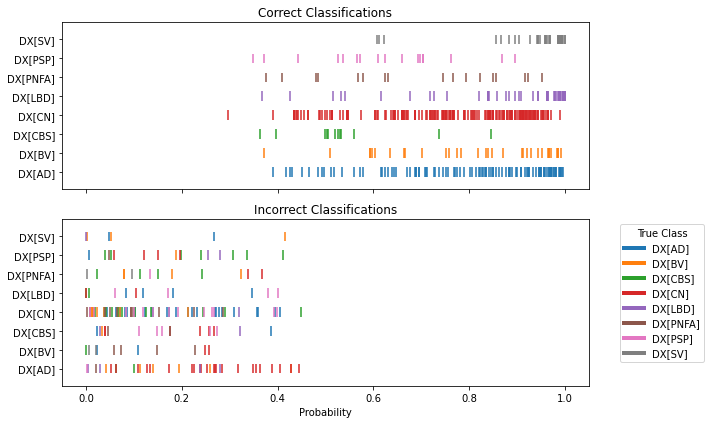

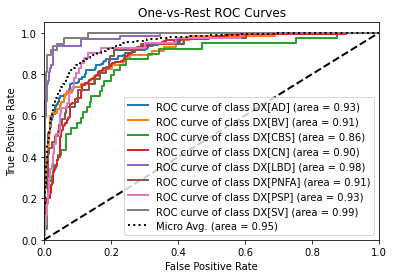

Optimal Thresholds: 
 {0: 0.2669649161313365, 1: 0.17973142828009658, 2: 0.03982090660934503, 3: 0.23811579556380194, 4: 0.23814461461621428, 5: 0.04005432028609917, 6: 0.08407584784693456, 7: 0.006119961348857008}


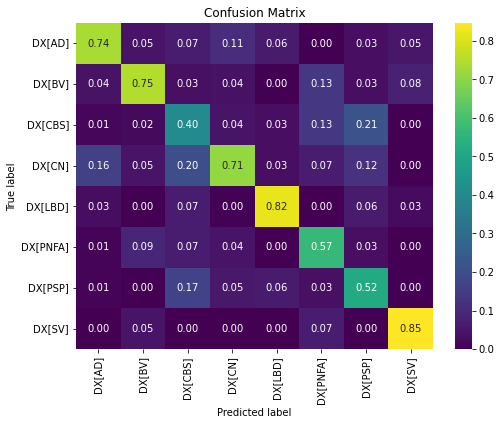

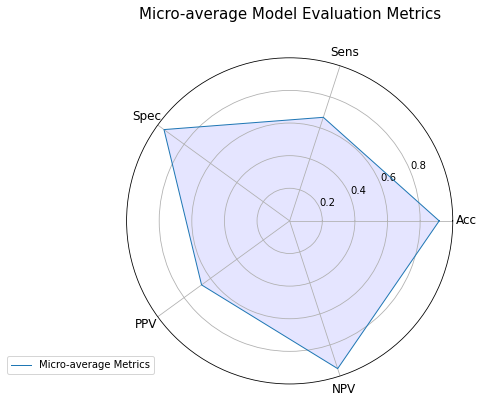

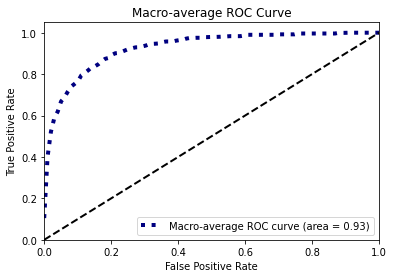

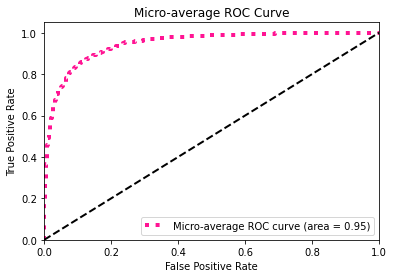

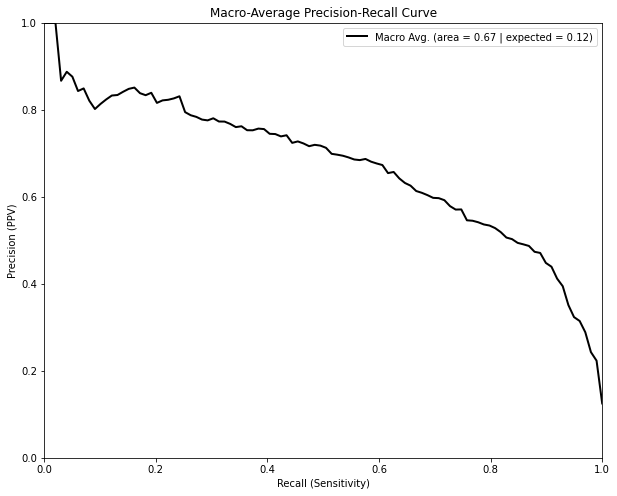

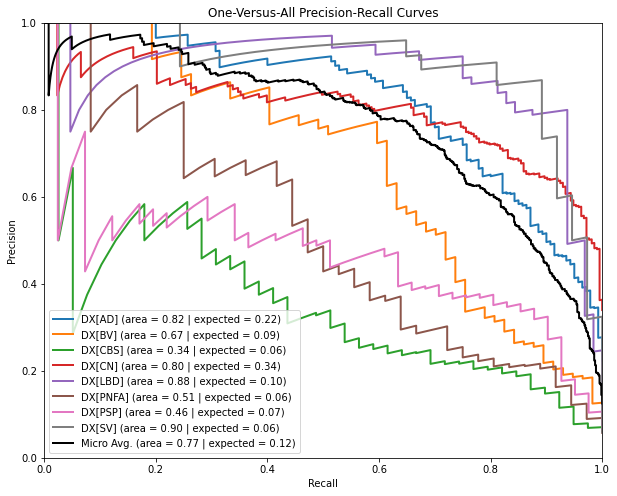

In [14]:
import pandas as pd
from calvin_utils.statistical_utils.logistic_regression import LogisticRegression
from calvin_utils.statistical_utils.classification_statistics import ComprehensiveMulticlassROC
y_true, y_pred, test_prob = LogisticRegression.run_loocv(outcome_matrix, design_matrix)
loocv_evaluator = ComprehensiveMulticlassROC(fitted_model=None, predictions_df=pd.DataFrame(test_prob, columns=outcome_matrix.columns), observation_df=outcome_matrix, normalization='pred', thresholds=None, out_dir=out_dir)
loocv_evaluator.run()

# 10 - Predict Unseen Data

In [15]:
new_csv_path='/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/collaborations/baratono_puzzles/puzzles_ind_results_UB_pearson.csv'

Optional - Get New Data

In [25]:
from calvin_utils.permutation_analysis_utils.statsmodels_palm import CalvinStatsmodelsPalm
# # Instantiate the PalmPrepararation class
new_palm = CalvinStatsmodelsPalm(input_csv_path=new_csv_path, output_dir=out_dir, sheet=sheet)
# Call the process_nifti_paths method
other_df = new_palm.read_and_display_data()
other_df

,DX,SUBID,AD,SV,LBD,BV,PNFA,CBS,PSP,CN,Peak_Values,True_DX
0,AD,sub-01,0.281879,0.308798,0.242734,0.000403,-0.013967,0.154068,0.252616,0.012003,4.566173,Unk
1,SV,sub-02,0.223304,0.057821,-0.069859,-0.158062,-0.088624,0.140492,-0.083423,0.088813,4.157365,Unk
2,LBD,sub-05,-0.114947,-0.165018,-0.259599,-0.174188,-0.009127,0.061547,-0.160206,0.034189,3.353371,Unk
3,BV,sub-06,0.310615,0.236292,0.422314,0.366446,0.026703,-0.039507,0.177837,0.002331,4.029418,Unk
4,AD,sub-07,0.287146,0.202965,0.177141,0.144155,0.120731,0.150958,0.201966,0.004432,6.227032,Unk
5,PNFA,sub-08,-0.083953,-0.133434,-0.105628,-0.030694,0.169215,0.235753,0.169244,0.080733,5.951636,Unk
6,AD,sub-09,0.130854,-0.024407,-0.189793,-0.112199,-0.114641,0.080265,-0.161628,0.090186,3.972676,Unk
7,PSP,sub-10,0.026365,-0.027807,-0.218836,-0.109895,0.107604,0.138421,-0.046659,0.124374,4.844020,Unk
8,AD,sub-11,0.073940,0.124338,-0.069333,-0.112670,-0.089497,0.009832,0.054946,0.104502,4.246857,Unk
9,CBS,sub-12,0.024703,0.069507,0.047398,0.060081,0.034481,0.097433,0.197991,0.066085,4.607718,Unk


In [26]:
# formula

In [27]:
# column_renaming_map = {
#                        'Mesial_Temporal': 'mesial_temporal_eh', 
#                        'parietal': 'parietal_eh', 
#                        'frontal': 'frontal_eh',
#                        'temporal': 'temporal_eh', 
#                        'ventricle':'ventricle_eh',
#                        'occipital': 'occipital_eh'}

In [28]:
# other_df.rename(columns=column_renaming_map, inplace=True)

Prepare Data

In [29]:
# Define the design matrix
# subset_df = other_df.groupby('DIAGNOSIS_BL').apply(lambda x: x.sample(min(len(x), 200))).reset_index(drop=True)
import pandas as pd
other_outcome_matrix, other_design_matrix = cal_palm.define_design_matrix(formula, other_df)

# Ensure both matrices have the same columns
if len(other_outcome_matrix.columns) != len(outcome_matrix.columns):
    # Create a zero-filled DataFrame with the same columns as outcome_matrix
    zero_df = pd.DataFrame(0, index=other_outcome_matrix.index, columns=outcome_matrix.columns)
    
    # Fill zero_df with values from other_outcome_matrix where columns exist
    common_columns = other_outcome_matrix.columns.intersection(outcome_matrix.columns)
    zero_df.loc[:, common_columns] = other_outcome_matrix.loc[:, common_columns]
    
    other_outcome_matrix = zero_df

other_design_matrix


,Intercept,AD,SV,LBD,BV,PNFA,CBS,PSP,CN,Peak_Values
0,1.0,0.281879,0.308798,0.242734,0.000403,-0.013967,0.154068,0.252616,0.012003,4.566173
1,1.0,0.223304,0.057821,-0.069859,-0.158062,-0.088624,0.140492,-0.083423,0.088813,4.157365
2,1.0,-0.114947,-0.165018,-0.259599,-0.174188,-0.009127,0.061547,-0.160206,0.034189,3.353371
3,1.0,0.310615,0.236292,0.422314,0.366446,0.026703,-0.039507,0.177837,0.002331,4.029418
4,1.0,0.287146,0.202965,0.177141,0.144155,0.120731,0.150958,0.201966,0.004432,6.227032
5,1.0,-0.083953,-0.133434,-0.105628,-0.030694,0.169215,0.235753,0.169244,0.080733,5.951636
6,1.0,0.130854,-0.024407,-0.189793,-0.112199,-0.114641,0.080265,-0.161628,0.090186,3.972676
7,1.0,0.026365,-0.027807,-0.218836,-0.109895,0.107604,0.138421,-0.046659,0.124374,4.844020
8,1.0,0.073940,0.124338,-0.069333,-0.112670,-0.089497,0.009832,0.054946,0.104502,4.246857
9,1.0,0.024703,0.069507,0.047398,0.060081,0.034481,0.097433,0.197991,0.066085,4.607718


Predict

Evaluate

In [30]:
formula

'DX ~ AD + SV + LBD + BV + PNFA + CBS + PSP + CN + Peak_Values'

In [31]:
# thresholds = {
#     0: lambda prob: 0 if prob < 0.33 else 1,
#     1: lambda prob: 1 if prob > 0.33 else 0
# }

Taking maximum probability as prediction.
There are 6.0 observations for DX[AD]
There are 1.0 observations for DX[BV]
There are 1.0 observations for DX[CBS]
There are 1.0 observations for DX[CN]
There are 1.0 observations for DX[LBD]
There are 1.0 observations for DX[PNFA]
There are 1.0 observations for DX[PSP]
There are 1.0 observations for DX[SV]


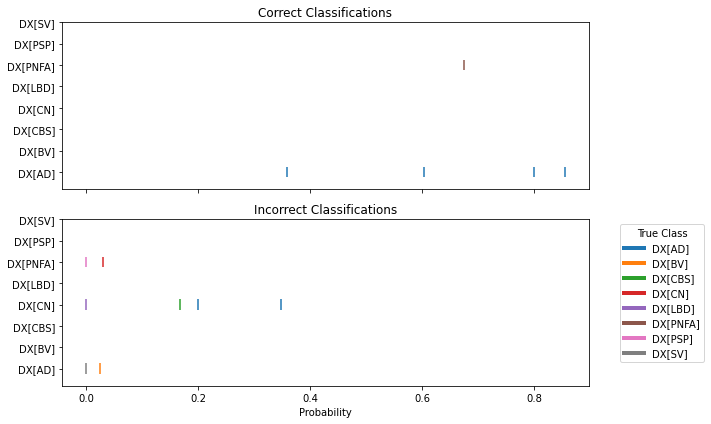

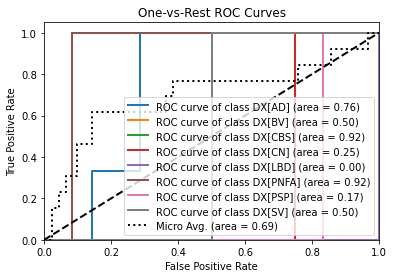

Optimal Thresholds: 
 {0: 0.20075806265529336, 1: 0.025218963121790835, 2: 0.16825610253622228, 3: 0.030284265046256552, 4: 1.2888536301688507, 5: 0.6753006765782636, 6: 0.0005687851404523242, 7: 0.00011700595701430932}


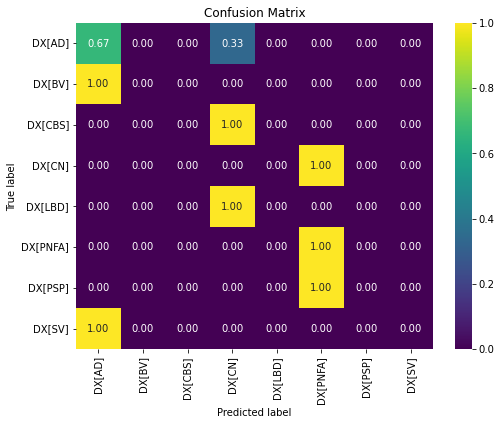

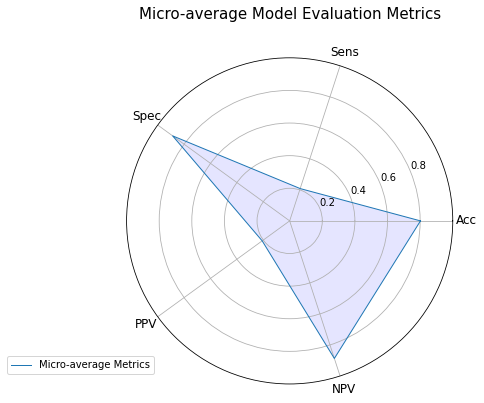

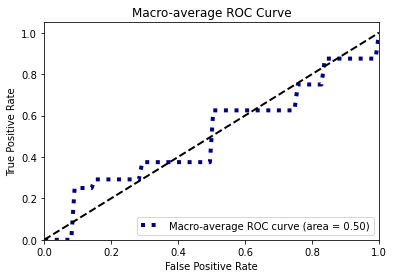

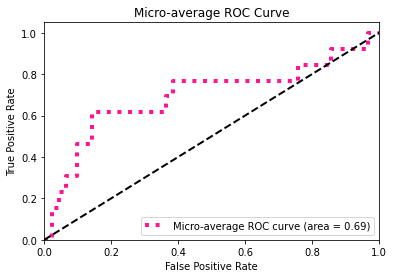

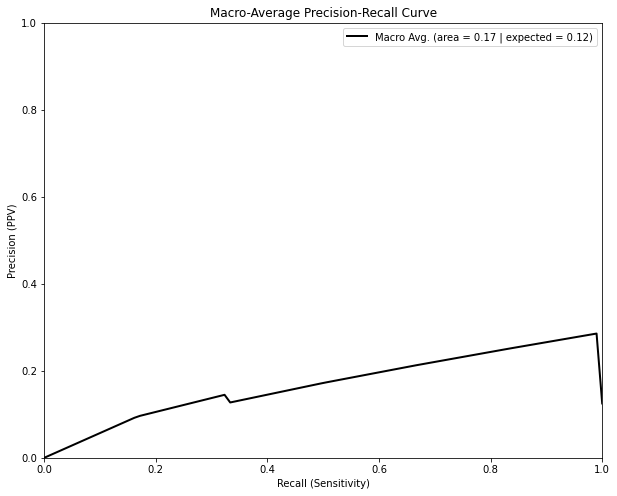

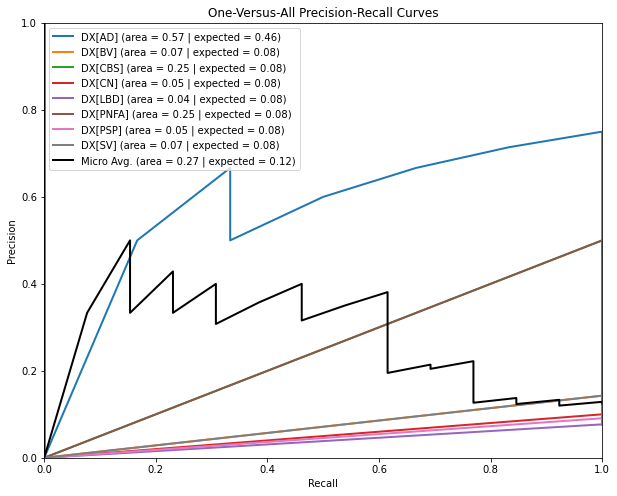

In [32]:
from calvin_utils.statistical_utils.classification_statistics import ComprehensiveMulticlassROC
loocv_evaluator = ComprehensiveMulticlassROC(fitted_model=None, predictions_df=results.predict(other_design_matrix), observation_df=other_outcome_matrix, normalization='true', thresholds=None, out_dir=out_dir)
loocv_evaluator.run()

In [36]:
loocv_evaluator.predictions_df.to_csv('/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/collaborations/baratono_puzzles/analyses/predictions.csv')

In [ ]:
loocv_evaluator.get_micro_auc('')

TypeError: ComprehensiveMulticlassROC.get_micro_auc() takes 1 positional argument but 2 were given

In [ ]:

###----- Functionally Programmed Functions for Evaluation Using Above Classes -----##
'''
Hanging imports to facilitate easy transplant of code.
'''
import numpy as np
from calvin_utils.statistical_utils.classification_statistics import ComprehensiveMulticlassROC
from calvin_utils.statistical_utils.logistic_regression import LogisticRegression
import os
from contextlib import redirect_stdout, redirect_stderr
from tqdm import tqdm

def resample_df(data_df):
    n_samples = data_df.shape[0]
    # Shuffle the indices
    shuffled_indices = np.random.permutation(n_samples)
    # Reorder the DataFrame based on the shuffled indices but keep the original index
    shuffled_df = data_df.iloc[shuffled_indices].reset_index(drop=True).set_index(data_df.index)
    return shuffled_df

def permute_auc_difference(data_df, formula1, formula2, cal_palm, n_iterations=1000):
    auc_diffs = []
    for i in tqdm(range(n_iterations)):
        try:
            with open(os.devnull, 'w') as fnull, redirect_stdout(fnull), redirect_stderr(fnull):
                # Define design matrices and outcome matrices for both formulas
                outcome_matrix, design_matrix1 = cal_palm.define_design_matrix(formula1, data_df)
                _, design_matrix2 = cal_palm.define_design_matrix(formula2, data_df)
                
                # Permute the outcomes
                if i == 0:
                    resampled_df = outcome_matrix
                else:
                    resampled_df = resample_df(outcome_matrix)

                # Fit the logistic regression model for the first formula
                logreg1 = LogisticRegression(resampled_df, design_matrix1)
                results1 = logreg1.run()

                # Fit the logistic regression model for the second formula
                logreg2 = LogisticRegression(resampled_df, design_matrix2)
                results2 = logreg2.run()

                # Evaluate the models
                evaluator1 = ComprehensiveMulticlassROC(fitted_model=results1, observation_df=resampled_df, normalization='true', thresholds=None, out_dir=None)
                micro_auc1 = evaluator1.get_micro_auc()

                evaluator2 = ComprehensiveMulticlassROC(fitted_model=results2, observation_df=resampled_df, normalization='true', thresholds=None, out_dir=None)
                micro_auc2 = evaluator2.get_micro_auc()

                # Store the difference in micro-average AUCs
                if i == 0:
                    obs_diff = micro_auc1 - micro_auc2
                    print(f"F1: {micro_auc1} | F2: {micro_auc2}")
                else:
                    auc_diffs.append(micro_auc1 - micro_auc2)
            
        except Exception as e:
            print(e)
            continue
    # Calculate p-value based on the distribution of differences
    auc_diffs = np.array(auc_diffs)
    p_value = np.mean(auc_diffs >= obs_diff)

    # Calculate confidence intervals for the difference
    lower_ci = np.percentile(auc_diffs, 2.5)
    upper_ci = np.percentile(auc_diffs, 97.5)
    
    return obs_diff, lower_ci, upper_ci, p_value

def bootstrap_auc(outcome_matrix, design_matrix, n_iterations=1000, model=None):
    auc_scores = []
    n_samples = outcome_matrix.shape[0]
    
    for i in tqdm(range(n_iterations)):
        # Suppress both stdout and stderr
        try:
            with open(os.devnull, 'w') as fnull, redirect_stdout(fnull), redirect_stderr(fnull):
                # Generate a bootstrap sample
                resample_idx = np.random.choice(n_samples, size=n_samples, replace=True)
                outcome_matrix_resampled = outcome_matrix.iloc[resample_idx]
                design_matrix_resampled = design_matrix.iloc[resample_idx]

                # Fit the logistic regression model
                if model is None:
                    logreg = LogisticRegression(outcome_matrix_resampled, design_matrix_resampled)
                    results = logreg.run()
                    test = ComprehensiveMulticlassROC(fitted_model=results, observation_df=outcome_matrix_resampled, normalization='true', thresholds=None, out_dir=None)
                else:
                    results = model.predict(design_matrix_resampled)
                    test = ComprehensiveMulticlassROC(fitted_model=None, predictions_df=results, observation_df=outcome_matrix_resampled, normalization='true', thresholds=None, out_dir=None)
                # Evaluate the model
                micro_auc = test.get_micro_auc()
                auc_scores.append(micro_auc)
        except:
            continue
    # Calculate confidence intervals
    lower_ci = np.percentile(auc_scores, 2.5)
    upper_ci = np.percentile(auc_scores, 97.5)    
    return np.mean(auc_scores), lower_ci, upper_ci, auc_scores


Bootstrap the Micro Average AUC

In [ ]:
import matplotlib
# from calvin_utils.statistical_utils.classification_statistics import bootstrap_auc
matplotlib.use('Agg')  # Use a non-interactive backend
mean_auc, lower_ci, upper_ci, auc_dist = bootstrap_auc(other_outcome_matrix, other_design_matrix, n_iterations=1000, model=results)
print(f'Mean AUC: {mean_auc}, 95% CI: ({lower_ci}, {upper_ci})')

In [ ]:
import pandas as pd
auc_df = pd.DataFrame({'val':auc_dist})
auc_df.to_csv('/path/to/df.csv')

In [ ]:
auc_df = pd.read_csv('/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/atrophy_seeds_2023/Figures/diagnostic_ability/50fit_150pred/auc_dist.csv')

In [ ]:
import numpy as np
from scipy.stats import ttest_ind, mannwhitneyu

def compare_bootstrapped_means(distribution1, distribution2):
    """
    Compares two bootstrapped distributions using a two-sample t-test and Mann-Whitney U test.
    
    Parameters:
    - distribution1 (list or array): Bootstrapped distribution of group 1.
    - distribution2 (list or array): Bootstrapped distribution of group 2.
    
    Returns:
    - t_stat (float): t-statistic from the two-sample t-test.
    - t_p_value (float): p-value from the two-sample t-test.
    - u_stat (float): U-statistic from the Mann-Whitney U test.
    - u_p_value (float): p-value from the Mann-Whitney U test.
    """
    # Perform a two-sample t-test to compare means
    t_stat, t_p_value = ttest_ind(distribution1, distribution2)
    
    # Perform a Mann-Whitney U test to compare distributions
    u_stat, u_p_value = mannwhitneyu(distribution1, distribution2)

    return t_stat, t_p_value, u_stat, u_p_value

# Compare the distributions
t_stat, t_p_value, u_stat, u_p_value = compare_bootstrapped_means(auc_df['CSF AUCs'], auc_df['CTh AUCs'])

print(f"Two-sample t-test: t-stat = {t_stat:.4f}, p-value = {t_p_value:.4f}")
print(f"Mann-Whitney U test: U-stat = {u_stat:.4f}, p-value = {u_p_value:.4f}")


Plot Bootstraps

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def plot_custom_bootstrap_auc(df):
    """
    Plots the mean and error bars of AUCs for each column in the DataFrame using Seaborn and Matplotlib,
    styled similarly to the reference plot.
    
    Parameters:
    - df (pd.DataFrame): DataFrame containing bootstrapped AUC distributions. 
                         Each column represents a different group.
    """
    # Initialize lists to store plotting data
    means = []
    lower_errors = []
    upper_errors = []
    y_labels = []

    # Calculate mean and confidence intervals for each column in the DataFrame, ignoring NaNs
    for column in df.columns:
        bootstrapped_values = df[column].dropna()  # Remove NaN values
        if len(bootstrapped_values) > 0:
            mean_value = np.mean(bootstrapped_values)
            lower_ci = np.percentile(bootstrapped_values, 2.5)
            upper_ci = np.percentile(bootstrapped_values, 97.5)
            
            means.append(mean_value)
            lower_errors.append(mean_value - lower_ci)
            upper_errors.append(upper_ci - mean_value)
            y_labels.append(column)

    # Create a horizontal scatter plot with error bars
    plt.figure(figsize=(6, len(means) * 1.2))  # Adjust height based on number of groups
    sns.set(style="whitegrid")
    
    # Assign colors from a color palette
    palette = sns.color_palette("tab10", len(means))

    # Plot the means as points with error bars
    for i, (mean, lower_err, upper_err, label) in enumerate(zip(means, lower_errors, upper_errors, y_labels)):
        plt.errorbar(x=mean, y=i, xerr=[[lower_err], [upper_err]], fmt='o', color=palette[i], capsize=5, markersize=10)
    
    # Customize y-ticks to match labels
    plt.yticks(range(len(y_labels)), y_labels)
    
    # Labels and title
    plt.xlabel('AUC')
    plt.ylabel('CAD Product')
    plt.title('Mean AUC with 95% CI for CAD Products')

    # Customize the grid and layout
    plt.grid(False)
    plt.xlim(0.4, 1.0)  # Set x-axis limits for AUC

    # Display the plot
    plt.tight_layout()
    plt.show()
    plt.savefig(out_dir + '/95ci.svg')

plot_custom_bootstrap_auc(auc_df)

Permutation Test Two AUCs

In [ ]:
other_df.columns

In [ ]:
f1 = "Diagnosis ~ CSF_Frontal + CSF_Temporal + CSF_Parietal + CSF_Occipital + CSF_MTL + CSF_Cerebellum + CSF_Subcortex"
f2 = "Diagnosis ~ GM_Frontal + GM_Temporal + GM_Parietal + GM_Occipital + GM_MTL + GM_Cerebellum + GM_Subcortex"

In [ ]:
# from calvin_utils.statistical_utils.classification_statistics import permute_auc_difference
obs_diff, lower_ci, upper_ci, p_value = permute_auc_difference(other_df, formula1=f1, 
                                                                  formula2=f2,
                                                                  cal_palm=cal_palm, n_iterations=1000)
print(f'Observed AUC Difference: {obs_diff}, 95% CI: ({lower_ci}, {upper_ci}), p-value: {p_value}')